## Cross validation helps to evaluate model performance , different models like SVM or Neural Networks

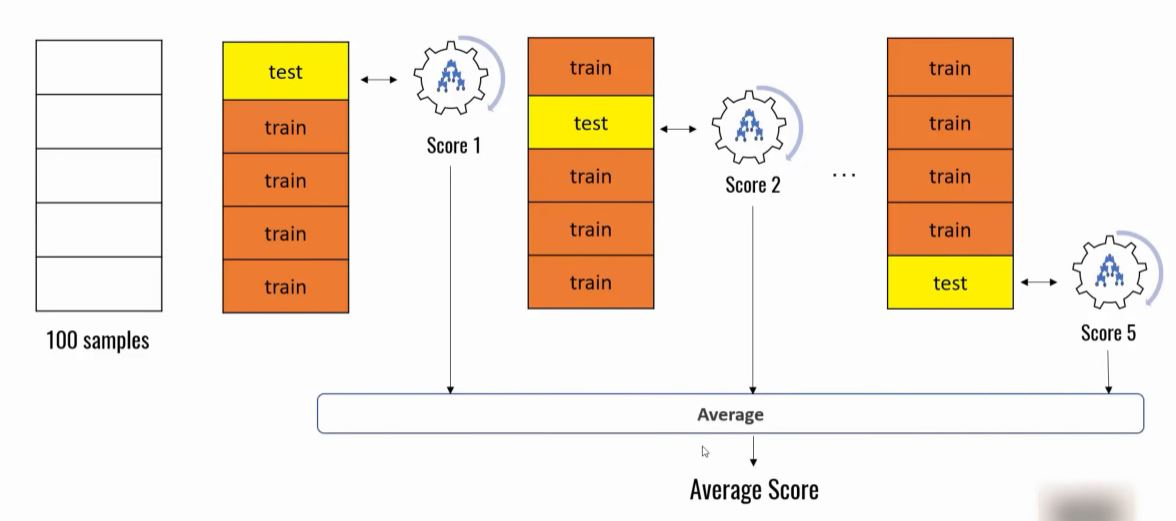

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.datasets import load_digits

In [3]:
digits = load_digits()

In [4]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(digits.data,digits.target,test_size=0.3)

In [6]:
lr = LogisticRegression()

In [7]:
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

D:\New folder\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9444444444444444

In [8]:
svm = SVC()
svm.fit(X_train,y_train)
svm.score(X_test,y_test)

0.987037037037037

In [9]:
rf = RandomForestClassifier(n_estimators=40)
rf.fit(X_train,y_train)
rf.score(X_test,y_test)

0.9555555555555556

In [10]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=3)
kf

KFold(n_splits=3, random_state=None, shuffle=False)

In [11]:
for train_index, test_index in kf.split([1,2,3,4,5,6,7,8,9]):
    print(train_index, test_index)

[3 4 5 6 7 8] [0 1 2]
[0 1 2 6 7 8] [3 4 5]
[0 1 2 3 4 5] [6 7 8]


In [12]:
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train,y_train)
    return model.score(X_test,y_test)

In [13]:
get_score(lr,X_train,X_test,y_train,y_test)

D:\New folder\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9444444444444444

In [14]:
from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=3)

In [21]:
scores_l = []
scores_svm = []
scores_rf = []

for train_index, test_index in kf.split(digits.data):
    X_train,X_test,y_train,y_test = digits.data[train_index], digits.data[test_index],digits.target[train_index],digits.target[test_index]
    scores_l.append(get_score(LogisticRegression(),X_train,X_test,y_train,y_test))
    scores_svm.append(get_score(SVC(),X_train,X_test,y_train,y_test))
    scores_rf.append(get_score(RandomForestClassifier(n_estimators=50),X_train,X_test,y_train,y_test))

D:\New folder\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\New folder\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_re

In [22]:
print(scores_l)

[0.9232053422370617, 0.9415692821368948, 0.9148580968280468]


In [23]:
print(scores_svm)

[0.9666110183639399, 0.9816360601001669, 0.9549248747913188]


In [24]:
print(scores_rf)

[0.9298831385642737, 0.9515859766277128, 0.9181969949916527]


### Cross val score method

In [25]:
from sklearn.model_selection import cross_val_score

In [26]:
cross_val_score(LogisticRegression(),digits.data,digits.target)

D:\New folder\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\New folder\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_re

array([0.92222222, 0.86944444, 0.94150418, 0.93871866, 0.89693593])

In [27]:
cross_val_score(SVC(),digits.data,digits.target)

array([0.96111111, 0.94444444, 0.98328691, 0.98885794, 0.93871866])

In [28]:
cross_val_score(RandomForestClassifier(),digits.data,digits.target)

array([0.92777778, 0.90833333, 0.95264624, 0.96100279, 0.92200557])